  # Assignment on parsing expressions
  
  
The code in this notebook is that of a Calculator.
Run this file and take a careful look at the generated file
parser.out Now answer the following questions in the Jove
markdown areas.

1.
          Write out the _context-free grammar_ governing this
          calculator's operation. You'll see this CFG sitting inside the file
          parser.out at the very top. **Best way to answer:** Pull
          out these CFG rules and copy them into your answer cell. Do
          understand the rules of course.

2.
          Which of these two operators has higher _precedence_ :
          \* or ^? Justify your answer in two sentences with
          respect to this grammar.  **Best way to answer:** State which
          operator has what precedence and tell us how you learned that by
          looking at the CFG rules.

3.
          What is the associativity (left/right) of the operators
          +, -, *, and ^ ?  Justify your answer in two
          sentences with respect to this grammar. **Best way to answer:**
          State which operator has what associativity and tell us how you
          learned that by looking at the CFG rules.

4.
          Which of the embedded calculations do not match
          Python's expression evaluation rules. Spot which expressions
          they are, and Explain Why this is happening. **Best way to
          answer:** Point out the answer difference that reveals this mismatch
          and explain that.


5.
          Insert a new answer cell, titled as Question 6e,
          parenthesize the Python expressions so as to match
          the answer provided by the Jove parser.  *Best way to
          answer:* We can't tell you where this cell will go, as it will give
          you a clue. Figure out where to insert the cell and provide the
          parenthesized expression there. Then show that by virtue of the added
          parentheses, the answer now matches.

Study  Ref-1 and Ref-2 to understand how Python deals with Expressions.

          
          [Ref-1](https://docs.python.org/2/reference/expressions.html#id26)
          Look at Section 5.4 of this document.

          [Ref-2](https://codeplea.com/exponentiation-associativity-options)

          *Best way to answer:* Provide your answer by stating (for e.g.)
          : The difference in the computed answer is due to the fact
          that Python as per Ref-n does (..such and such..)
          when it sees a unary minus and exponentiation. But
          the provided grammar does (..such and such..) which is different.

6.
          By studying Ref-2, Point out the similarities and
          differences between C++, Python, and Google Sheets
          when it comes to handling expressions.  Just a few sentences talking
          about similarities and a few sentences about the
          differences in the following context.

           
            a. Associativity of exponentiation
            b. Whether negation or exponentiation is handled first
        

   *Best way to answer:* Answers in the Jove cells your answer for these two questions.
   


## Q6

The code below is that for a calculator

### Q6(a)

Run this file and look at parser.out. Write out the context-free 
grammar generated for the expressions of this calculator.

```
Rule 0     S' -> expression
Rule 1     expression -> expression PLUS term
Rule 2     expression -> expression MINUS term
Rule 3     expression -> term
Rule 4     term -> term TIMES factor
Rule 5     term -> term DIVIDE factor
Rule 6     term -> factor
Rule 7     factor -> innerfactor EXP factor
Rule 8     factor -> innerfactor
Rule 9     innerfactor -> UMINUS innerfactor
Rule 10    innerfactor -> LPAREN expression RPAREN
Rule 11    innerfactor -> NUMBER
```

### Q6(b)

Which of these two operators has higher precedence : * or ^ ? 
Justify your answer in two sentences with respect to this grammar.

<span style="color: blue">
The `^` operator has higher precedence than `*` since `^` comes from the `factor` rule (in **Rule 7**), and `*` comes from `term` (in **Rule 4**) which is where `factor` comes from too.  This means that `*` must be higher in the tree, and therefore lower precedence.
</span>

### Q6(c)

What is the associativity (left/right) of the operators +, -, *, and ^ ?  Justify your answer in two sentences with respect to this grammar.

<span style="color: blue">
The operators `+`, `-`, and `*` are left-associative.  This is because recursion happens on the left (i.e. `expression -> expression PLUS term`).  If we parsed `1 + 1 + 1`, we cannot put the left `+` at the top of the tree because we would have no rule for the right `+`.
</span>

<span style="color: blue">
The operator `^` is right-associative.  This is because recursion happens on the right (`factor -> innerfactor EXP factor`).
</span>


### Q6(d)

Some of the embedded calculations do not match Python's expression evaluation rules. Spot which expressions they are, and explain why this is happening?

You should refer to the following References Ref-1 and Ref-2
to understand how Python deals with expressions. 

You should relate this to how this grammar is dealing
with expressions.

You must provide your answer by (e.g.) saying "Ref-n says Python does
<..such and such..> when it sees unary minus and exponentiation. But
     the provided grammar does <..such and such..> which is different.
     Hence the difference in the answers.
    
    Ref-1: Section 5.4 of
    https://docs.python.org/2/reference/expressions.html#id26
    
    Ref-2: https://codeplea.com/exponentiation-associativity-options

<span style="color: blue">
`-2^2  = 4`  (**embedded calculator**)
</span>

<span style="color: blue">
`-2**2 = -4` (**python3**)
</span>

<span style="color: blue">
**embedded calculator** : Uses a grammer that gives `unary minus` **higher** precedence
</span>

<span style="color: blue">
**python3** : *unary minus* binds **less tightly** than **exponentiation**
</span>


### Q6(e)

With respect to Ref-2,
Point out the similarities and differences between C++, Python, and 
Google Sheets when it comes to handling. Just a few sentences talkingvabout similarities and a few sentences about the differences.
    
- Associativity of exponentiation
- Whether negation or exponentiation is handled first

<span style="color: blue">
In `python` and `google-sheets`, the associativity of exponentiation
is **right-associative** and in `c++` its **left associative**
</span>

<span style="color: blue">
**negation** is handled first by `c++` and `google-sheets`
and **exponentiation** is handled first in `python`
</span>

# Calculator using good and bad precedences

This Jove file illustrates precedences wrt two grammars, also showing how to build a calculator. There are some good ideas in the excellent tutorial at URL http://www.dabeaz.com/ply/example.html , but we are not following the automatic resolution of precedences (for illustration)

In [1]:
from lex import lex
from yacc import yacc

from jove.StateNameSanitizers import ResetStNum, NxtStateStr
from jove.SystemImports       import *


You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)



## Token definitions

This is the lexer for REs. We begin with token definitions

In [2]:
# Following ideas from http://www.dabeaz.com/ply/example.html heavily
tokens = ('NUMBER','LPAREN','RPAREN','PLUS', 'MINUS', 'TIMES','DIVIDE', 'UMINUS', 'EXP') 

# Tokens
t_PLUS    = r'\+'
t_MINUS   = r'\-'
t_TIMES   = r'\*'
t_DIVIDE  = r'\/'
t_LPAREN  = r'\('
t_RPAREN  = r'\)' 
t_UMINUS  = r'\~' 
t_EXP     = r'\^'

# parsing + semantic actions in one place!
def t_NUMBER(t):
    r'\d+'
    try:
        t.value = int(t.value)
    except ValueError:
        print("Integer value too large %d", t.value)
        t.value = 0
    return t

# Ignored characters
t_ignore = " \t"

def t_newline(t):
    r'\n+'
    t.lexer.lineno += t.value.count("\n")
    
def t_error(t):
    print("Illegal character '%s'" % t.value[0])
    t.lexer.skip(1)
    

## These parsing rules specify many things. 

We begin with operator precedence rules that are essentially to help the "LALR parser" (also known as the bottom-up parser) resolve 'shift-reduce conflicts'.

In [3]:
# Parsing rules - NOT USED as we LAYER grammars!

# Precedences, following BODMAS; not needed due to grammar layering
# 
#precedence = (
#   ('left','MINUS', 'PLUS'),
#   ('left','TIMES','DIVIDE'),   
#   ('right','UMINUS')    
#   )

## CFG productions and semantic actions

These Python functions whose names begin with "p_" house (1) the CFG production rules within their documentation strings. (2) the semantic actions within their body. The semantic actions can refer to grammar symbol attributes within CFG productions. We will explain one of these rules now.

Take the rules 

 expression -> expression PLUS term
 expression -> term
 
1) This function defines the first production rule

def p_expression_plus(t):

   a) This comment string expresses the production rule
   
    '''expression : expression PLUS term'''
    
   b) This line below tells us that the occurrence of 'expression' on
      the left-hand side is marked t[0], and its value is determined by
      applying function attrDyadicInfix onto its three arguments below.
      Here, t[1] is the attribute of 'expression' coming after the colon (:)
      and the attribute of catexp is t[3]
      
    t[0] = attrDyadicInfix("+", t[1], t[3])    
    
2) This function expresses the second related production rule where the
   basis case 
    
def p_expression_plus1(t):
    '''expression : term'''

    t[0] = t[1]  
    
** ALL THE ABOVE is how RE PARSING WORKED. For Numbers, we made a change as per the following. **
    
We are now encoding (value, tree) pairs as attributes.., so use t[1][0] for value and t[1][1] for tree.

In [4]:

def p_expression_1(t):
    'expression : expression PLUS term'
    #
    t[0] = (t[1][0] + t[3][0],
            attrDyadicInfix("+", t[1][1], t[3][1]))   
    
def p_expression_2(t):
    'expression : expression MINUS term'
    #
    t[0] = (t[1][0] - t[3][0],
            attrDyadicInfix("-", t[1][1], t[3][1]))   
    
def p_expression_3(t):
    'expression : term'
    #
    t[0] = t[1]  
    
# Consult this excellent reference for info on precedences
# https://www.cs.utah.edu/~zachary/isp/worksheets/operprec/operprec.html
    
    
def p_term_1(t):
    'term :  term TIMES factor'
    #
    t[0] = (t[1][0] * t[3][0],
            attrDyadicInfix("*", t[1][1], t[3][1])) 

    
def p_term_2(t):
    'term :  term DIVIDE factor'
    #
    if (t[3][0] == 0):
        print("Error, divide by zero!")
        t[3][0] = 1 # fix it
    t[0] = (t[1][0] / t[3][0],
            attrDyadicInfix("/", t[1][1], t[3][1]))


def p_term_3(t):
    'term :  factor'
    #
    t[0] = t[1]  

def p_factor_1(t):
    'factor : innerfactor EXP factor'
    #
    t[0] = (t[1][0] ** t[3][0],
            attrDyadicInfix("**", t[1][1], t[3][1])) 

def p_factor_2(t):
    'factor : innerfactor'
    #
    t[0] = t[1]
    
def p_innerfactor_1(t):
    'innerfactor : UMINUS innerfactor'
    #
    ast  = ('~', t[2][1]['ast'])
    
    nlin = t[2][1]['dig']['nl']
    elin = t[2][1]['dig']['el']
    
    rootin = nlin[0]

    root = NxtStateStr("~E_") 
    left = NxtStateStr("~_")

    t[0] =(-t[2][0], 
           {'ast' : ast,
            'dig' : {'nl' : [ root, left ] + nlin, # this order important for proper layout!
                     'el' : elin + [ (root, left),
                                     (root, rootin) ]
                    }})

    
def p_innerfactor_2(t):
    'innerfactor : LPAREN expression RPAREN'
    #
    ast  = t[2][1]['ast']
    
    nlin = t[2][1]['dig']['nl']
    elin = t[2][1]['dig']['el']
    
    rootin = nlin[0]
    
    root = NxtStateStr("(E)_")
    left = NxtStateStr("(_")
    right= NxtStateStr(")_")
    
    t[0] =(t[2][0],
           {'ast' : ast,
            'dig' : {'nl' : [root, left] + nlin + [right], #order important f. proper layout!
                     'el' : elin + [ (root, left),
                                     (root, rootin),
                                     (root, right) ]
                    }})

def p_innerfactor_3(t):
    'innerfactor : NUMBER'
    #
    strn = str(t[1])
    ast  = ('NUMBER', strn)           
    t[0] =(t[1],
           { 'ast' : ast,
             'dig' : {'nl' : [ strn + NxtStateStr("_") ],
                      'el' : []
                     }})


def p_error(t):
    print("Syntax error at '%s'" % t.value)

#--
    
def attrDyadicInfix(op, attr1, attr3):
    ast  = (op, (attr1['ast'], attr3['ast']))
    
    nlin1 = attr1['dig']['nl']
    nlin3 = attr3['dig']['nl']
    nlin  = nlin1 + nlin3
    
    elin1 = attr1['dig']['el']
    elin3 = attr3['dig']['el']
    elin  = elin1 + elin3
    
    rootin1 = nlin1[0]
    rootin3 = nlin3[0]    
    
    root   = NxtStateStr("E1"+op+"E2"+"_") # NxtStateStr("$_")
    left   = rootin1
    middle = NxtStateStr(op+"_")
    right  = rootin3
    
    return {'ast' : ast,
            'dig' : {'nl' : [ root, left, middle, right ] + nlin,
                     'el' : elin + [ (root, left),
                                     (root, middle),
                                     (root, right) ]
                     }}

#===
# This is the main function in this Jove file.  
#===

def parseRE(s):
    """In: a string s containing a regular expression.
       Out: An attribute triple consisting of
            1) An abstract syntax tree suitable for processing in the derivative-based scanner
            2) A node-list for the parse-tree digraph generated. Good for drawing a parse tree 
               using the drawPT function below
            3) An edge list for the parse-tree generated (again good for drawing using the
               drawPT function below)
    """
    mylexer  = lex()
    myparser = yacc()
    pt = myparser.parse(s, lexer = mylexer)
    
    # print('parsed result  is ', pt)
    # (result, ast, nodes, edges)
    return (pt[0], pt[1]['ast'], pt[1]['dig']['nl'], pt[1]['dig']['el'])

def drawPT(ast_rslt_nl_el, comment="PT"):
    """Given an (ast, nl, el) triple where nl is the node and el the edge-list,
       draw the Parse Tree by returning a dot object.
    """
    (rslt, ast, nl, el) = ast_rslt_nl_el
    
    print("Result calculated = ", rslt)
    print("Drawing AST for ", ast)
    
    dotObj_pt = Digraph(comment)
    dotObj_pt.graph_attr['rankdir'] = 'TB'
    for n in nl:
        prNam = n.split('_')[0]
        dotObj_pt.node(n, prNam, shape="oval", peripheries="1")
    for e in el:
        dotObj_pt.edge(e[0], e[1])
    return dotObj_pt

Result calculated =  1.008594091576999
Drawing AST for  ('**', (('NUMBER', '2'), ('**', (('~', ('NUMBER', '3')), ('~', ('NUMBER', '4'))))))


Generating LALR tables


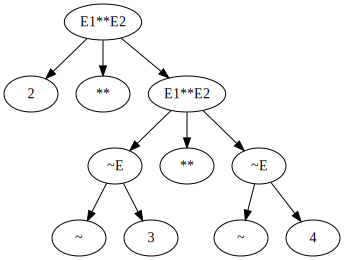

In [5]:
drawPT(parseRE("2^~3^~4"))

In [6]:
2**(-3)**(-4)

1.008594091576999

In [7]:
2**(-3**-4)

0.9914791374956781

In [8]:
2**-3**-4

0.9914791374956781

Result calculated =  0.012345679012345678
Drawing AST for  ('**', (('~', ('NUMBER', '3')), ('~', ('NUMBER', '4'))))


Generating LALR tables


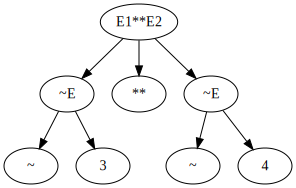

In [9]:
drawPT(parseRE("~3^~4"))

In [ ]:
drawPT(parseRE("2^~3^~4"))

In [ ]:
-3**-4

In [ ]:
-(3**-4)

In [ ]:
(-3)**(-4)

In [ ]:
drawPT(parseRE("3*3^3*3"))

In [ ]:
drawPT(parseRE("1"))

In [ ]:
drawPT(parseRE("1+2"))

In [ ]:
drawPT(parseRE("1+2*3"))

In [ ]:
drawPT(parseRE("1+~2"))

In [ ]:
drawPT(parseRE("1+~2*3/4"))

In [ ]:
# Check with Python!
1+-2*3/4

In [ ]:
# Correct as per
# https://www.cs.utah.edu/~zachary/isp/worksheets/operprec/operprec.html
drawPT(parseRE("2*3/4"))

In [ ]:
2*3/4

In [ ]:
# Correct as per
# https://www.cs.utah.edu/~zachary/isp/worksheets/operprec/operprec.html
drawPT(parseRE("2/3*4"))

In [ ]:
2/3*4

In [ ]:
# More tests from
# https://www.cs.utah.edu/~zachary/isp/worksheets/operprec/operprec.html
drawPT(parseRE("2/3/4"))

In [ ]:
2/3/4

In [ ]:
# More tests from
# https://www.cs.utah.edu/~zachary/isp/worksheets/operprec/operprec.html
drawPT(parseRE("4/3*2/5"))

In [ ]:
4/3*2/5

In [ ]:
# More tests from
# https://www.cs.utah.edu/~zachary/isp/worksheets/operprec/operprec.html
drawPT(parseRE("6*3/4*5"))

In [ ]:
6*3/4*5

In [ ]:
drawPT(parseRE("6*3/4*~5/(2+3-4-5-6/7*~8)-~9"))

In [ ]:
# Check against Python!
6*3/4*-5/(2+3-4-5-6/7*-8)--9

In [ ]:
drawPT(parseRE("6*3^4*5"))

In [ ]:
6*3**4*5